# Random Forest Regression and Linear Regression Model
Overview of Implementation
1. <a href="#section1">Import Dataset</a>
2. <a href="#section2">Cleaning the Data for Model Training</a>
3. <a href="#section3">Random Tree Regressor</a>
4. <a href="#section4">Linear Regression Model</a>

In [71]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from scipy import stats
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statistics import mean, median, mode, stdev
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## <a id='section1'>Import Dataset</a>

In [77]:
train = pd.read_csv('train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## <a id='section2'>Cleaning the Data for Model Training</a>
Remove the NA data and perform One Hot Encoding

In [78]:
nullData = [['LotFrontage', 259], ['MasVnrArea', 8], ['Electrical', 1], ['GarageYrBlt', 81]]
n = len(train)
treshold = 0.1
drop = []

print('Drop feature - too many nulls:')
for i in nullData:
    if i[1]/n > treshold: # Arbitrary treshold: 10%
        print(i[0])
        train.drop(columns=[i[0]], inplace=True)
    else:
        drop.append(i[0])
        
print('Remove data point:')
print(drop)
train.dropna(subset=drop, inplace=True)

train

Drop feature - too many nulls:
LotFrontage
Remove data point:
['MasVnrArea', 'Electrical', 'GarageYrBlt']


,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [79]:
#One-Hot encoding
categoricalcolumns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond','Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
train1 = pd.get_dummies(train, columns= categoricalcolumns, prefix= categoricalcolumns)
print(train1)

        Id  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        1     8450       2003          2003       196.0         706   
1        2     9600       1976          1976         0.0         978   
2        3    11250       2001          2002       162.0         486   
3        4     9550       1915          1970         0.0         216   
4        5    14260       2000          2000       350.0         655   
...    ...      ...        ...           ...         ...         ...   
1455  1456     7917       1999          2000         0.0           0   
1456  1457    13175       1978          1988       119.0         790   
1457  1458     9042       1941          2006         0.0         275   
1458  1459     9717       1950          1996         0.0          49   
1459  1460     9937       1965          1965         0.0         830   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLw  \
0              0        150          856       856  ...     

## <a id='section3'>Random Tree Regressor</a>
This model can be used for both classification and regression, and is built on top of the Decision Tree method. It works by randomly selecting data subsets, creating decision trees on each subset, and then vote for the best solution. The more trees there are in the forest, the more robust the model. While Random Forest can eliminate the problem of overfitting that a normal Decision Tree might experience, it is slower and might be difficult to interpret.

We first employ a random forest classifier with default parameters.

In [136]:
#train-test split
TEST_SIZE = 0.2

filteredData1 = train1.drop(['Id'], axis=1)
train_df, test_df = train_test_split(filteredData1, test_size=TEST_SIZE)

train_X = train_df.drop('SalePrice', axis=1)
train_Y = train_df['SalePrice']
test_X = test_df.drop('SalePrice', axis=1)
test_Y = test_df['SalePrice']

In [137]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X, train_Y)
y_pred = model.predict(test_X)
train_accuracy = model.score(train_X,train_Y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy =", model.score(train_X,train_Y))
print ("Test accuracy =", model.score(test_X,test_Y))

Train accuracy = 0.9654132892316339
Test accuracy = 0.8682623578041531


In [138]:
#comparing the actual and the predicted SalePrice values
df = pd.DataFrame({'Real Values':test_Y, 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
409,339750,290150.0
514,96500,95089.3
754,156000,136250.0
1018,160000,175348.0
817,271000,289015.4
...,...,...
854,170000,190340.0
368,132000,147885.0
344,85000,104220.0
147,222500,241022.5


In [139]:
#Accuracy report
realVals = df["Real Values"]
predictedVals = df["Predicted Values"]
mse = mean_squared_error(realVals, predictedVals)
rmse = math.sqrt(mse)
print ("Mean square error (MSE) = ", mse)
print ("Root mean square error (RMSE) = ", rmse)
average_y = mean(realVals)
mbs = mean_absolute_error(realVals, predictedVals)
print("Mean absolute error (MBS) = ", mbs)
print ("The MBS occupies ",(mbs/average_y), " of the average SalePrice value")

Mean square error (MSE) =  832697291.9027007
Root mean square error (RMSE) =  28856.494795846233
Mean absolute error (MBS) =  18402.260583941603
The MBS occupies  0.09729714991381509  of the average SalePrice value


One limitation is that the Random Forest Regressor is unable to discover trends that would enable it in extrapolating values that fall outside the training set. 

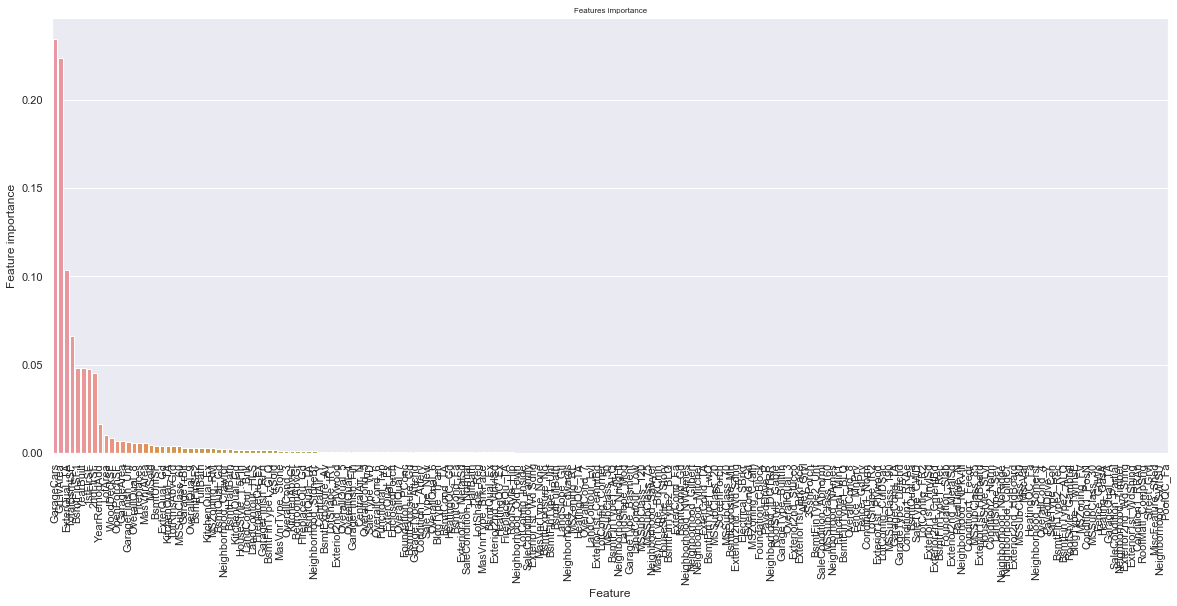

In [140]:
#model optimisation - feature importance
tmp = pd.DataFrame({'Feature': train_X.columns, 'Feature importance': model.feature_importances_})
tmp1 = tmp.sort_values(by='Feature importance',ascending=False)
tmp1 = tmp1[:198] #drop all variables which have zero feature importance
plt.figure(figsize = (20,8))
plt.title('Features importance',fontsize=8)
s = sb.barplot(x='Feature',y='Feature importance',data=tmp1)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [141]:
#List of features sorted from most to least important
sorted_importances = pd.DataFrame(tmp1['Feature importance'])
sorted_features = pd.DataFrame(tmp1['Feature'])
print(sorted_importances)
print(sorted_features)

     Feature importance
21             0.234239
11             0.223502
197            0.103387
7              0.066164
4              0.048319
..                  ...
153            0.000016
52             0.000015
297            0.000014
92             0.000012
289            0.000011

[198 rows x 1 columns]
                Feature
21           GarageCars
11            GrLivArea
197        ExterQual_TA
7           TotalBsmtSF
4            BsmtFinSF1
..                  ...
153    RoofMatl_CompShg
52          Street_Grvl
297    MiscFeature_Shed
92   Neighborhood_SWISU
289           PoolQC_Fa

[198 rows x 1 columns]


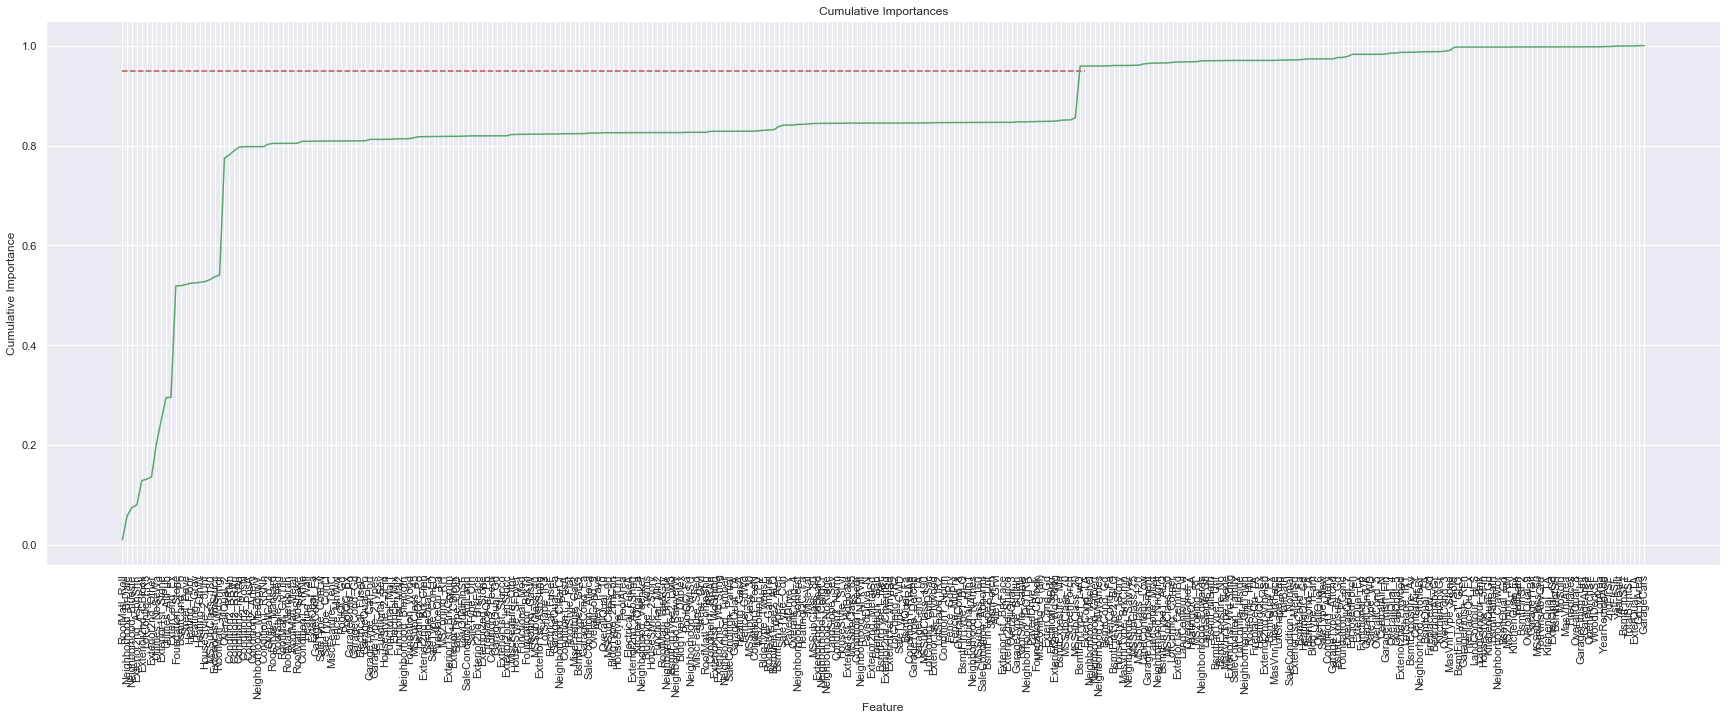

In [142]:
importance = model.feature_importances_

featurelist = []
for c in train_X.columns:
    featurelist.append(c)

indices = np.argsort(importance)
cumulativeimpt= np.cumsum(importance)
featurerank = [featurelist[i] for i in indices]


plt.figure(figsize=(30,10))
plt.plot(featurerank, cumulativeimpt, 'g-')
plt.xticks(featurerank, rotation = 'vertical')
plt.xlabel('Feature')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

In [143]:
countimpt = 0
for i in cumulativeimpt:
    if i >= 0.95:
        countimpt += 1
    
print('Number of features for 95% importance:', countimpt)

Number of features for 95% importance: 117


In [145]:
# Extract the names of the most important features
important_feature_names = sorted_features[0:countimpt]
print (important_feature_names)

                  Feature
21             GarageCars
11              GrLivArea
197          ExterQual_TA
7             TotalBsmtSF
4              BsmtFinSF1
..                    ...
88    Neighborhood_NWAmes
82   Neighborhood_Gilbert
85   Neighborhood_Mitchel
201          ExterCond_TA
223      BsmtFinType1_LwQ

[117 rows x 1 columns]


In [146]:
list1 = []
for i in sorted_features[0:106]["Feature"]:
    list1.append(i)

In [147]:
#use the top 106 variables for regression model training
train_X_new = train_X[list1]
test_X_new = test_X[list1]

In [148]:
#Accuracy after feature selection
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
model = regressor.fit(train_X_new, train_Y)
y_pred = model.predict(test_X_new)
train_accuracy_new = model.score(train_X_new,train_Y)
test_accuracy_new = model.score(test_X_new,test_Y)
print ("Train accuracy =", model.score(train_X_new,train_Y))
print ("Test accuracy =", model.score(test_X_new,test_Y))

Train accuracy = 0.9640313932816602
Test accuracy = 0.8704860616757081


In [149]:
#improvement in accuracy
train_improvement = (train_accuracy_new - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_new - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = -0.1431403488420565 %
Test accuracy improvement = 0.2561096714107004 %


We can see that the test accuracy has improved with feature selection

## <a id='section4'>Linear Regression Model</a>
LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [103]:
model = LinearRegression()
X, y = train_X, train_Y
reg = model.fit(X, y)
train_accuracy = model.score(X,y)
test_accuracy = model.score(test_X,test_Y)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X,test_Y) ) #R-squared value

Train accuracy =  0.9428067697522091
Test accuracy =  0.4707342301186222


In [82]:
predicted_y = reg.predict(test_X)
mse = mean_squared_error(test_Y, predicted_y)
rmse = math.sqrt(mse)
print ("Root mean square error (RMSE) = ", rmse)

Root mean square error (RMSE) =  55840.1121922734


In [98]:
#Applying Standardization (Z-Score method)
continuous = ['LotArea', 'YearBuilt', 'YearRemodAdd', 
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
features_stand=train1.copy()
for i in continuous:
    # fit on training data column
    scale = StandardScaler().fit(features[[i]])
    # transform training data column
    features_stand[i] = scale.transform(features_stand[[i]])

In [99]:
train_X_stan, test_X_stan, train_Y_stan, test_Y_stan = train_test_split(features_stand,labels,test_size=0.2, random_state=0)

In [100]:
model = LinearRegression()
X, y = train_X_stan, train_Y_stan
reg = model.fit(X, y)
train_accuracy_new = model.score(X,y)
test_accuracy_new = model.score(test_X_stan,test_Y_stan)
print ("Train accuracy = ", model.score(X, y)) #R-squared value
print ("Test accuracy = ", model.score(test_X_stan,test_Y_stan)) #R-squared value

Train accuracy =  1.0
Test accuracy =  1.0


Both the train and test accuracy have improved drastically after Z-score standardization

In [105]:
#improvement in accuracy
train_improvement = (train_accuracy_new - train_accuracy)/train_accuracy*100
test_improvement = (test_accuracy_new - test_accuracy)/test_accuracy*100
print ("Train accuracy improvement =", train_improvement,"%")
print ("Test accuracy improvement =", test_improvement,"%")

Train accuracy improvement = 2.1799483486362012 %
Test accuracy improvement = 82.56908555886562 %
